# Сборный проект №2

**Доброго времени суток! Меня зовут Айнур, тут часто спрашивают про «ты»/«вы», я рад любому формату.**

В данном проекте я выстыпаю аналитиком стартапа, продающий продукты питания с помощью мобильного приложения. 

**Цель** - исследование поведений пользователей мобильного приложения.

Можно выделить следующие **задачи**:
- ознакомление с данными и предобработка;
- исследовательский анализ данных;
- анализ воронки событий
- анализ результатов экспериментов.

Сами пункты включают в себя подпункты. В данном проекте представлен один датасет.

**P.S.** под строками кода я буду оставлять свои комментарии и делать небольшие выводы в таком формате: **<font color="green">Комментарий:<font>** 

## Знакомство с датасетом

In [1]:
import pandas as pd
from scipy import stats as st
from math import factorial, sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
#pd.set_option('max_colwidth', 130)
import datetime as dt
import scipy.stats as stats
from datetime import datetime, timedelta
#pd.set_option('display.float_format', '{:.2f}'.format)

**<font color="green">Комментарий:<font>** Импортирование библиотек.

In [2]:
def preprocessing(file):
    print('Количество пропусков:')
    print(file.isna().sum())
    print('')
    print('Количество дубликатов:')
    print(file.duplicated().sum())
    print('')
    print('Доля дубликатов от общего числа записей:', round(file.duplicated().sum() / file.shape[0] * 100, 2), '%')

**<font color="green">Комментарий:<font>** Создание функции для визуального уменьшения кода. 

In [3]:
try:
    data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
except:
    data = pd.read_csv('logs_exp.csv', sep='\t')
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


**<font color="green">Комментарий:<font>** Чтение csv-файла

In [4]:
data.columns = ['event', 'userid', 'date','group']

**<font color="green">Комментарий:<font>** Заменяем названия столбцов.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   event   244126 non-null  object
 1   userid  244126 non-null  int64 
 2   date    244126 non-null  int64 
 3   group   244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**<font color="green">Комментарий:<font>** Всего **244126** записей, представлено 4 столбца, столбец `date` представлен в числовом формате, его нужно перевести в соответствующий формат.

In [6]:
preprocessing(data)

Количество пропусков:
event     0
userid    0
date      0
group     0
dtype: int64

Количество дубликатов:
413

Доля дубликатов от общего числа записей: 0.17 %


**<font color="green">Комментарий:<font>** В датасете нет пропусков, но есть явные дубликаты, их нужно обработать.

**<font color="green">Комментарий:<font>** Вывод по первой части:
    
В датафрейме **244126** записей, есть дубликаты, всего 4 столбца(название события, идентификатор пользователя, дата события и группа эксперимента)

## Обработка данных

In [7]:
data['date'] = pd.to_datetime(data['date'], unit='s')
data['dt'] = pd.to_datetime(data['date'].dt.date)

**<font color="green">Комментарий:<font>** Переводим столбец `date` в формат даты и времени. Добавляем новый столбец с датой.
    

In [8]:
data.drop_duplicates()

,event,userid,date,group,dt
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


**<font color="green">Комментарий:<font>** Удаляем явные дубликаты, новое число записей - **243713**

In [9]:
print('Минимальная исследуемая дата:', data['date'].min())
print()
print('Максимальная исследуемая дата:', data['date'].max())

Минимальная исследуемая дата: 2019-07-25 04:43:36

Максимальная исследуемая дата: 2019-08-07 21:15:17


**<font color="green">Комментарий:<font>** Определяем диапазон исследования.

In [10]:
duplicat_users = np.intersect1d(data.query('group == "246"')['userid'].unique(), data.query('group == 247')['userid'].unique())
duplicat_users

array([], dtype=int64)

**<font color="green">Комментарий:<font>** В датасете нет пользователей, которые были бы в двух группах одновременно, это хорошо.

**<font color="green">Комментарий:<font>** Вывод по первой части:
    
На данном этапе были обработаны данные, а именно удалены дубликаты, изменен тип данных для времени и добавлен новый столбец.

## Исследовательский анализ данных

### Количество событий в логе

In [11]:
print('Список названия событий:')
print(data['event'].unique())
print()
print('Количество уникальных событий:', len(data['event'].unique()))

Список названия событий:
['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']

Количество уникальных событий: 5


**<font color="green">Комментарий:<font>** Всего представлено **5** уникальных событий.

### Количество уникальных пользователей в логе

In [12]:
len(data['userid'].unique())

7551

**<font color="green">Комментарий:<font>** исследование проводилось среди **75581** пользователей.

### Среднее количество событий в логе

In [13]:
wsx = data.pivot_table(index='userid', values='event', aggfunc=('count'))
wsx

,event
userid,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


In [14]:
print('Среднее количество событий на одного пользовтеля:', round(wsx['event'].sum()/len(data['userid'].unique())))

Среднее количество событий на одного пользовтеля: 32


**<font color="green">Комментарий:<font>** На одного пользователея приходится в среднем **32** события.

In [15]:
wsx.describe()

,event
count,7551.000000
mean,32.330287
std,65.312344
min,1.000000
25%,9.000000
50%,20.000000
75%,37.500000
max,2308.000000


<div class="alert alert-info"> <b>Комментарий №2:</b> По медианому значения на одного пользователя приходится **20** событий.

### Определение диапазона исследования

**<font color="green">Комментарий:<font>** Ранее мы определили максимальную и минимальную даты:

Минимальная исследуемая дата: 2019-07-25 04:43:36

Максимальная исследуемая дата: 2019-08-07 21:15:17

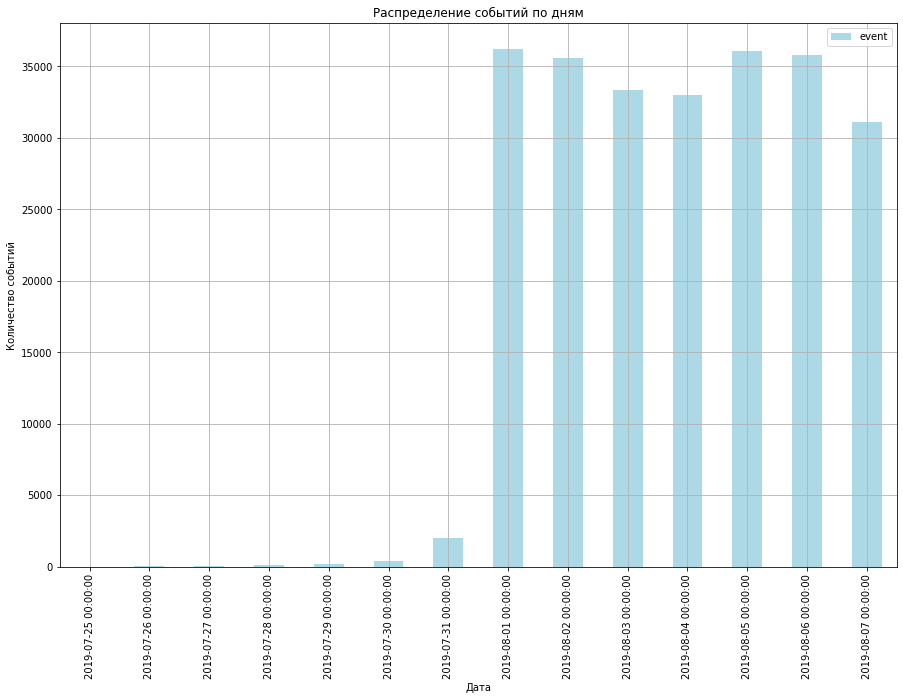

In [16]:
data.pivot_table(index='dt', values='event', aggfunc=('count'))\
.plot(kind='bar', title='Распределение событий по дням', figsize=(15, 10),color = "lightblue");
plt.xlabel('Дата');
plt.grid()
plt.ylabel('Количество событий');

**<font color="green">Комментарий:<font>** На графике видим, что в июле месяце неполные данные. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Следовательно весь июль месяц получился неполным.
    
Будем работать с данными за август месяц, отбросив данные июля. Перед этим рассмотрим данные июля месяца:

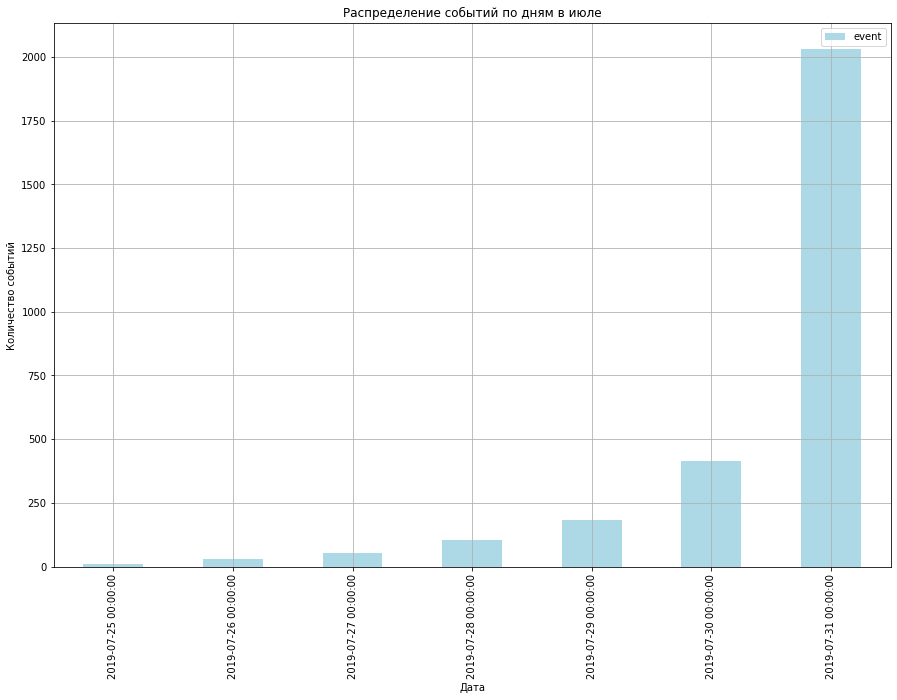

In [17]:
datafilt = data.query('dt < "2019-08-01"')
datafilt.pivot_table(index='dt', values='event', aggfunc=('count'))\
.plot(kind='bar', title='Распределение событий по дням в июле', figsize=(15, 10),color = "lightblue");
plt.xlabel('Дата');
plt.grid()
plt.ylabel('Количество событий');

**<font color="green">Комментарий:<font>** За первые шесть дней исследования, всего собрано около тысячи событий, на седьмой день - чуть более двух тысяч.

In [18]:
datafilt = datafilt.pivot_table(index='userid', values='event', aggfunc=('count')).reset_index()
print(datafilt['event'].sum())

2828


**<font color="green">Комментарий:<font>** Всего за июль - 2828 событий, отбросим их.

In [19]:
df = data.copy()
df = data.query('dt >= "2019-08-01"')

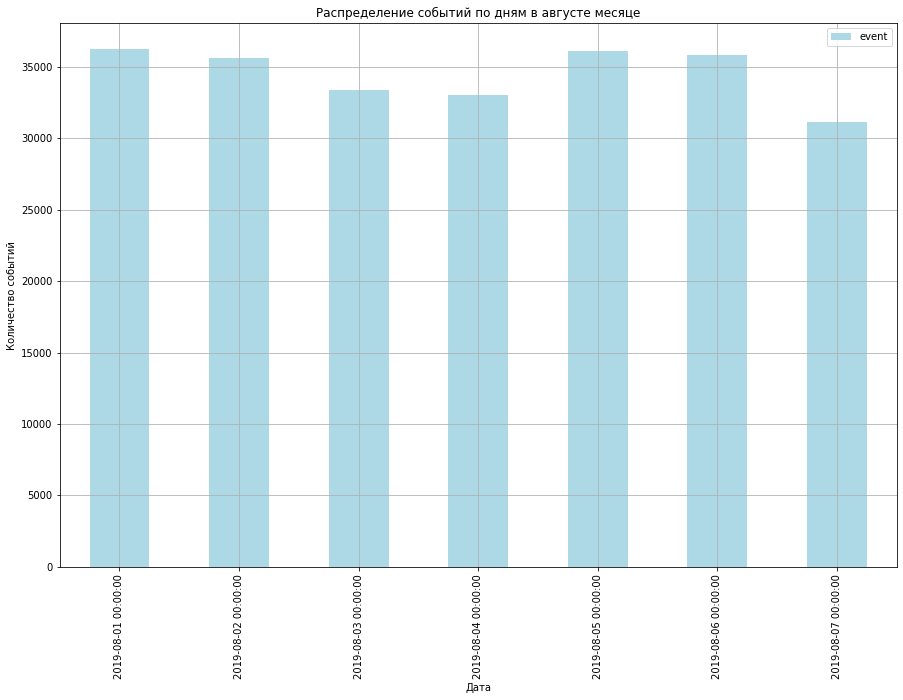

In [20]:
df.pivot_table(index='dt', values='event', aggfunc=('count'))\
.plot(kind='bar', title='Распределение событий по дням в августе месяце', figsize=(15, 10),color = "lightblue");
plt.xlabel('Дата');
plt.grid()
plt.ylabel('Количество событий');

**<font color="green">Комментарий:<font>** Создаем уже полноценный график.

In [21]:
df['group'].value_counts()

248    84726
246    79425
247    77147
Name: group, dtype: int64

**<font color="green">Комментарий:<font>** Да, все группы присутствуют в обновленном датасете.

In [22]:
print('Доля июльских событий от общего числа:', round(datafilt['event'].sum() / data.shape[0] * 100, 2), '%')

Доля июльских событий от общего числа: 1.16 %


In [23]:
print('Доля июльских пользователей от общего числа:',\
round(len(datafilt['userid'].unique()) / len(data['userid'].unique()) * 100, 2), '%')

Доля июльских пользователей от общего числа: 19.22 %


**<font color="green">Комментарий:<font>** Вывод по третьей части:
    
Была определена временная рамка для дальнейшего исследования - начиная с **2019-08-01**, за июль хранится **2828** событий. На одного пользователя приходится **20** событий, всего **7551** пользователей. По обновленному графику можно сделать визуальный вывод, что события распределены **нормально**. Всего после обновления временных рамок мы теряем чуть более **1%** событий от общего числа и чуть менее **20%** уникальных пользователей.

## Анализ воронки событий

### Частота событий в логах

In [24]:
df['event'].value_counts()

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event, dtype: int64

**<font color="green">Комментарий:<font>** Разберем события:
Всего представлено 5 событий:
    
    1. Действия на главном экране, самое популярное событие, так как пользователь изначально появляется на главном экране при открытии приложения.
    
    2. Блок с каталогом, куда пользователь попадает при поиске нужного продукта.
    
    3. Корзина пользователя, где собраны товары, которые он "положил".
    
    4. Страница с успешным результатом оплаты корзины.
    
    5. Инструкция по пользованию приложения.
    
С каждым этапом количество действий пользователями уменьшается, что является естественным процессом при просмотре приложения. Также есть инструкция, которая помогает пользователям ориентироваться, но она не является обязательной частью при использовании приложения.  

### Расчёт доли пользователей по событиям

In [25]:
asd = df.groupby('event').agg({'userid':'nunique'})\
.sort_values(by='userid', ascending=False).reset_index().rename(columns={'userid' : 'total_users'})
asd['percentage'] = asd['total_users'] / data['userid'].nunique()
asd.style.format({'percentage': '{:.2%}'})

,event,total_users,percentage
0,MainScreenAppear,7419,98.25%
1,OffersScreenAppear,4593,60.83%
2,CartScreenAppear,3734,49.45%
3,PaymentScreenSuccessful,3539,46.87%
4,Tutorial,840,11.12%


**<font color="green">Комментарий:<font>** С первого действия до оплаты товара доходят только 46% пользователей от общего числа.

### Предположение порядка событий

**<font color="green">Комментарий:<font>** Действия происходят в том порядке как представлено ранее, а именно по частоте пользователей, кроме действия "Tutorial", он не является обязательным. Скорее всего, его можно открыть на любом этапе либо на первых страницах приложения.

### Расчёт доли по событиям

In [26]:
q = [7419, 7419, 4593, 3734, 3539]
ok = round(asd['total_users'] / q * 100, 2)
ok

0    100.00
1     61.91
2     81.30
3     94.78
4     23.74
Name: total_users, dtype: float64

In [27]:
asd['shift'] = asd['total_users'].shift(fill_value=7419)
asd['share'] = asd['total_users'] / asd['shift']
asd.style.format({'percentage': '{:.2%}', 'share' : '{:.2%}'})

,event,total_users,percentage,shift,share
0,MainScreenAppear,7419,98.25%,7419,100.00%
1,OffersScreenAppear,4593,60.83%,7419,61.91%
2,CartScreenAppear,3734,49.45%,4593,81.30%
3,PaymentScreenSuccessful,3539,46.87%,3734,94.78%
4,Tutorial,840,11.12%,3539,23.74%


**<font color="green">Комментарий:<font>** Здесь можно сделать вывод, что пользователи, которые открыли свою корзину в 94% оплачивают товар. "Tutorial" показывает низкие результаты конверсии, но как сказано ранее - он не обязателен.

### Какая доля пользователей доходит от первого события до оплаты?

In [28]:
print(round(asd['total_users'].iloc[3] / asd['total_users'].iloc[0], 2))

0.48


**<font color="green">Комментарий:<font>** 48% пользователей доходят до оплаты товара.

**<font color="green">Комментарий:<font>** Вывод по четвертой части:
    
Около половины пользователей, которые посетили главную страницу оплачивают свою корзину. Хорошая конверсия, но стоит учитывать, что это приложение по покупке товаров, можно акцентировать внимание на том, что пользователи приложений по покупке продуктов отличаются от пользователей приложений по покупке товаров, которые не являются продуктами. Вторым свойственно рассматривать товары, сравнивать, планировать свои покупки. Первые же нуждаются в продуктах в краткосрочной перспективе, поэтому их посещение более направлено на результат. 

## Анализ результатов эксперимента 

### Количество уникальных пользователей в каждой группе

In [29]:
df['group'].replace(to_replace= (246,247,248), value = ('A1', 'A2', 'B'), inplace=True )

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
users = df.groupby('group').agg({'userid':'nunique'})\
.sort_values(by='userid', ascending=False).reset_index().rename(columns={'userid' : 'total_users'})
users.loc[3] = ['A1A2', 4997]
print(users)

  group  total_users
0     B         2537
1    A2         2513
2    A1         2484
3  A1A2         4997


**<font color="green">Комментарий:<font>** Между группами существует небольшая разница в диапазоне 55 пользователей.

### Подготовка общей таблицы для A/A и A/B эксперимента. А/А-эксперимент

In [31]:
df = df.query('event != "Tutorial"')

**<font color="green">Комментарий:<font>** Удалим событие "Tutorial", так как оно не является обязательным событием и многие пользователи могут обойтись без него.

In [32]:
groups = df.pivot_table(index='event', values='userid', aggfunc=('nunique'), columns='group')\
.reset_index().rename(columns={'userid' : 'total_users'})
groups

group,event,A1,A2,B
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181


**<font color="green">Комментарий:<font>** Создадим датафрейм по событиям, где столбцами будут группы.

In [33]:
users_A1 = int(users[users['group'] == 'A1']['total_users'])
users_A2 = int(users[users['group'] == 'A2']['total_users'])
print('Количество пользователей в группах различается на', round(100 - (users_A1 / users_A2 * 100), 2), '%')

Количество пользователей в группах различается на 1.15 %


**<font color="green">Комментарий:<font>** Группы не должны различаться на более 1%, но данная разница - не критична.

In [34]:
users = users.set_index(users.columns[0])
groups['A1A2'] = groups['A1'] + groups['A2']

**<font color="green">Комментарий:<font>**
    
A/A тест позволяет проверить проверить корректность проведения A/B теста и следующих расчетов. Используем z-test для проверки статистически значимой разницы между группами.

Сформируем гипотезы:

Нулевая гипотеза - События общего кол-ва пользователей и пользователей в группе теста равны.

Альтернативная гипотеза - События общего кол-ва пользователей и пользователей в группе теста не равны.
    
P.S. не совсем смог создать функцию для проверки гипотез, пришлось прибегнуть к сторонним ресурсам...

In [35]:
def ztest(group1, group2, event, alpha): 
    
    p1_event = groups.loc[event, group1]
    
    p2_event = groups.loc[event, group2] 
    
    p1_users = users.loc[group1, 'total_users'] 
    
    p2_users = users.loc[group2, 'total_users'] 
    
    p1 = p1_event / p1_users 
    
    p2 = p2_event / p2_users 
    
    difference = p1 - p2
    
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    sidak = 1 - (1 - 0.1)**(1/16)
    
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(group1, group2, event, p_value=p_value))
    if (p_value < sidak):
        print("Отвергаем нулевую гипотезу о равенстве конверсии в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах")

In [36]:
for event in groups.index:
    ztest('A1', 'A2', event, 0.1)
    print()

Проверка для групп A1 и A2, событие: 0, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и A2, событие: 1, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и A2, событие: 2, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и A2, событие: 3, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**<font color="green">Комментарий:<font>** A/A-тест показал, что между группами нет значимой разницы при статистической значимости 10%

### А/B-эксперимент

**<font color="green">Комментарий:<font>** Далее в задании требуется выбрать наиболее популярное событие(посещение главного экрана) и провести тест, но немного уйдем от задания и проведем тесты по всем пунктам.

**<font color="green">Комментарий:<font>** Сравним первую группу и контрольную группу, гипотезы те же.

In [37]:
for event in groups.index:
    ztest('A1', 'B', event, 0.1)
    print()

Проверка для групп A1 и B, событие: 0, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и B, событие: 1, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и B, событие: 2, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1 и B, событие: 3, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**<font color="green">Комментарий:<font>** Тест показал, что группы равны при стат. значимости 10%.

**<font color="green">Комментарий:<font>** Проведем тест для второй и контрольной группы:

In [38]:
for event in groups.index:
    ztest('A2', 'B', event, 0.1)
    print()

Проверка для групп A2 и B, событие: 0, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A2 и B, событие: 1, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A2 и B, событие: 2, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A2 и B, событие: 3, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**<font color="green">Комментарий:<font>** Результат неизменен.

**<font color="green">Комментарий:<font>** Объединим группы А1 и А2, сравним с общую группу с контрольной группой, гипотезы остаются прежними:

In [39]:
groups['A1A2'] = groups['A1'] + groups['A2']

In [40]:
for event in groups.index:
    ztest('A1A2', 'B', event, 0.1)
    print()

Проверка для групп A1A2 и B, событие: 0, p-значение: 0.18
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1A2 и B, событие: 1, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1A2 и B, событие: 2, p-значение: 0.43
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A1A2 и B, событие: 3, p-значение: 0.60
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**<font color="green">Комментарий:<font>** Результат неизменен. 16 тестов показали, что поведение пользователей не изменилось с внедрением нового шрифта. Сформулируем общий вывод.

<div class="alert alert-info"> <b>Комментарий №2:</b> Всего было проведено 16 тестов. Был выбран метод Шидака, результаты тестов не изменились.

## Вывод

Из **7551** пользователей **48%** доходят до покупки товара, большего всего пользователей застревают при переходе на этапе просмотра каталога. На одного пользователя приходится **20** событий в среднем. 

Результаты **A/A и A/B-тестов**:

Задачей было выяснить какой шрифт лучше. По результатам анализа можно сделать вывод, что значимой разницы между шрифтами нет. Поведение пользователей не изменялось на протяжении эксперимента.

Две группы А дают определенные преимущества. При равенстве групп, мы можем быть уверены, что результаты A/B-теста не будут искажены. К тому же сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

**Рекомендации** для компании:

На данном этапе не стоит акцентировать внимание на шрифте приложения, результаты экспериментов являются подтверждением. Нужно разобраться почему при переходе с главного экрана на просмотр каталога происходит резкое снижение количества пользователей.